<a href="https://colab.research.google.com/github/atilanodan/credit-churn/blob/main/Credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
# Librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Carga de dataset
df = pd.read_csv('BankChurners.csv').iloc[:, :-2]
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.00,777,11914.00,1.33,1144,42,1.62,0.06
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.00,864,7392.00,1.54,1291,33,3.71,0.10
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.00,0,3418.00,2.59,1887,20,2.33,0.00
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.00,2517,796.00,1.41,1171,20,2.33,0.76
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.00,0,4716.00,2.17,816,28,2.50,0.00


2. Limpieza y Calidad de Datos



*   Tamaño del dataset



In [46]:
# Chequear dimensiones
print(f'El dataset tiene {df.shape[0]:,} filas y {df.shape[1]} columnas. \n')
print(df.columns)

El dataset tiene 10,127 filas y 21 columnas. 

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')




*   Información relevante



In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_



*   Chequear y eliminar valores nulos. En este dataset no hay.



In [33]:
nulls = df.isnull().sum()
print(nulls)

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64




*   Chequear y eliminar duplicados



In [31]:
duplicados = df.duplicated().sum()
print(f'Hay {duplicados} duplicados')

Hay 0 duplicados




*   Resumen estadístico descriptivo



In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.00,739177606.33,36903783.45,708082083.00,713036770.50,717926358.00,773143533.00,828343083.00
Customer_Age,10127.00,46.33,8.02,26.00,41.00,46.00,52.00,73.00
Dependent_count,10127.00,2.35,1.30,0.00,1.00,2.00,3.00,5.00
Months_on_book,10127.00,35.93,7.99,13.00,31.00,36.00,40.00,56.00
Total_Relationship_Count,10127.00,3.81,1.55,1.00,3.00,4.00,5.00,6.00
Months_Inactive_12_mon,10127.00,2.34,1.01,0.00,2.00,2.00,3.00,6.00
Contacts_Count_12_mon,10127.00,2.46,1.11,0.00,2.00,2.00,3.00,6.00
Credit_Limit,10127.00,8631.95,9088.78,1438.30,2555.00,4549.00,11067.50,34516.00
Total_Revolving_Bal,10127.00,1162.81,814.99,0.00,359.00,1276.00,1784.00,2517.00
Avg_Open_To_Buy,10127.00,7469.14,9090.69,3.00,1324.50,3474.00,9859.00,34516.00




*   Resumen de variables categóricas



In [78]:
categoricas = df.select_dtypes(include='object').columns

for col in categoricas:
    print(df[col].value_counts())
    print("*" * 40)

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
****************************************
Gender
F    5358
M    4769
Name: count, dtype: int64
****************************************
Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64
****************************************
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64
****************************************
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64
****************************************
Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64
****************************************


3. Análisis Univariado

* Variable objetivo Attrition Flag (cantidad / porcentaje de personas que abandonan el producto)

In [79]:
conteo = df['Attrition_Flag'].value_counts()
porcentaje = df['Attrition_Flag'].value_counts(normalize=True) * 100

print(conteo)
print("\nEn porcentaje:")
print(porcentaje.round(1))

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

En porcentaje:
Attrition_Flag
Existing Customer   83.90
Attrited Customer   16.10
Name: proportion, dtype: float64


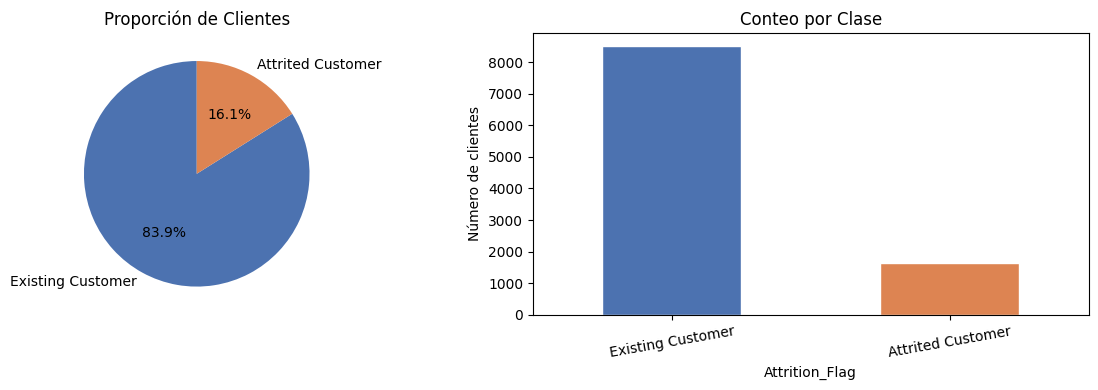

In [80]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].pie(
    conteo,
    labels=conteo.index,
    autopct='%1.1f%%',
    colors=['#4C72B0', '#DD8452'],
    startangle=90
)
axes[0].set_title('Proporción de Clientes')


conteo.plot(kind='bar', ax=axes[1], color=['#4C72B0', '#DD8452'], edgecolor='white')
axes[1].set_title('Conteo por Clase')
axes[1].set_xticklabels(conteo.index, rotation=10)
axes[1].set_ylabel('Número de clientes')

plt.tight_layout()
plt.show()

* Visualización de variables numéricas

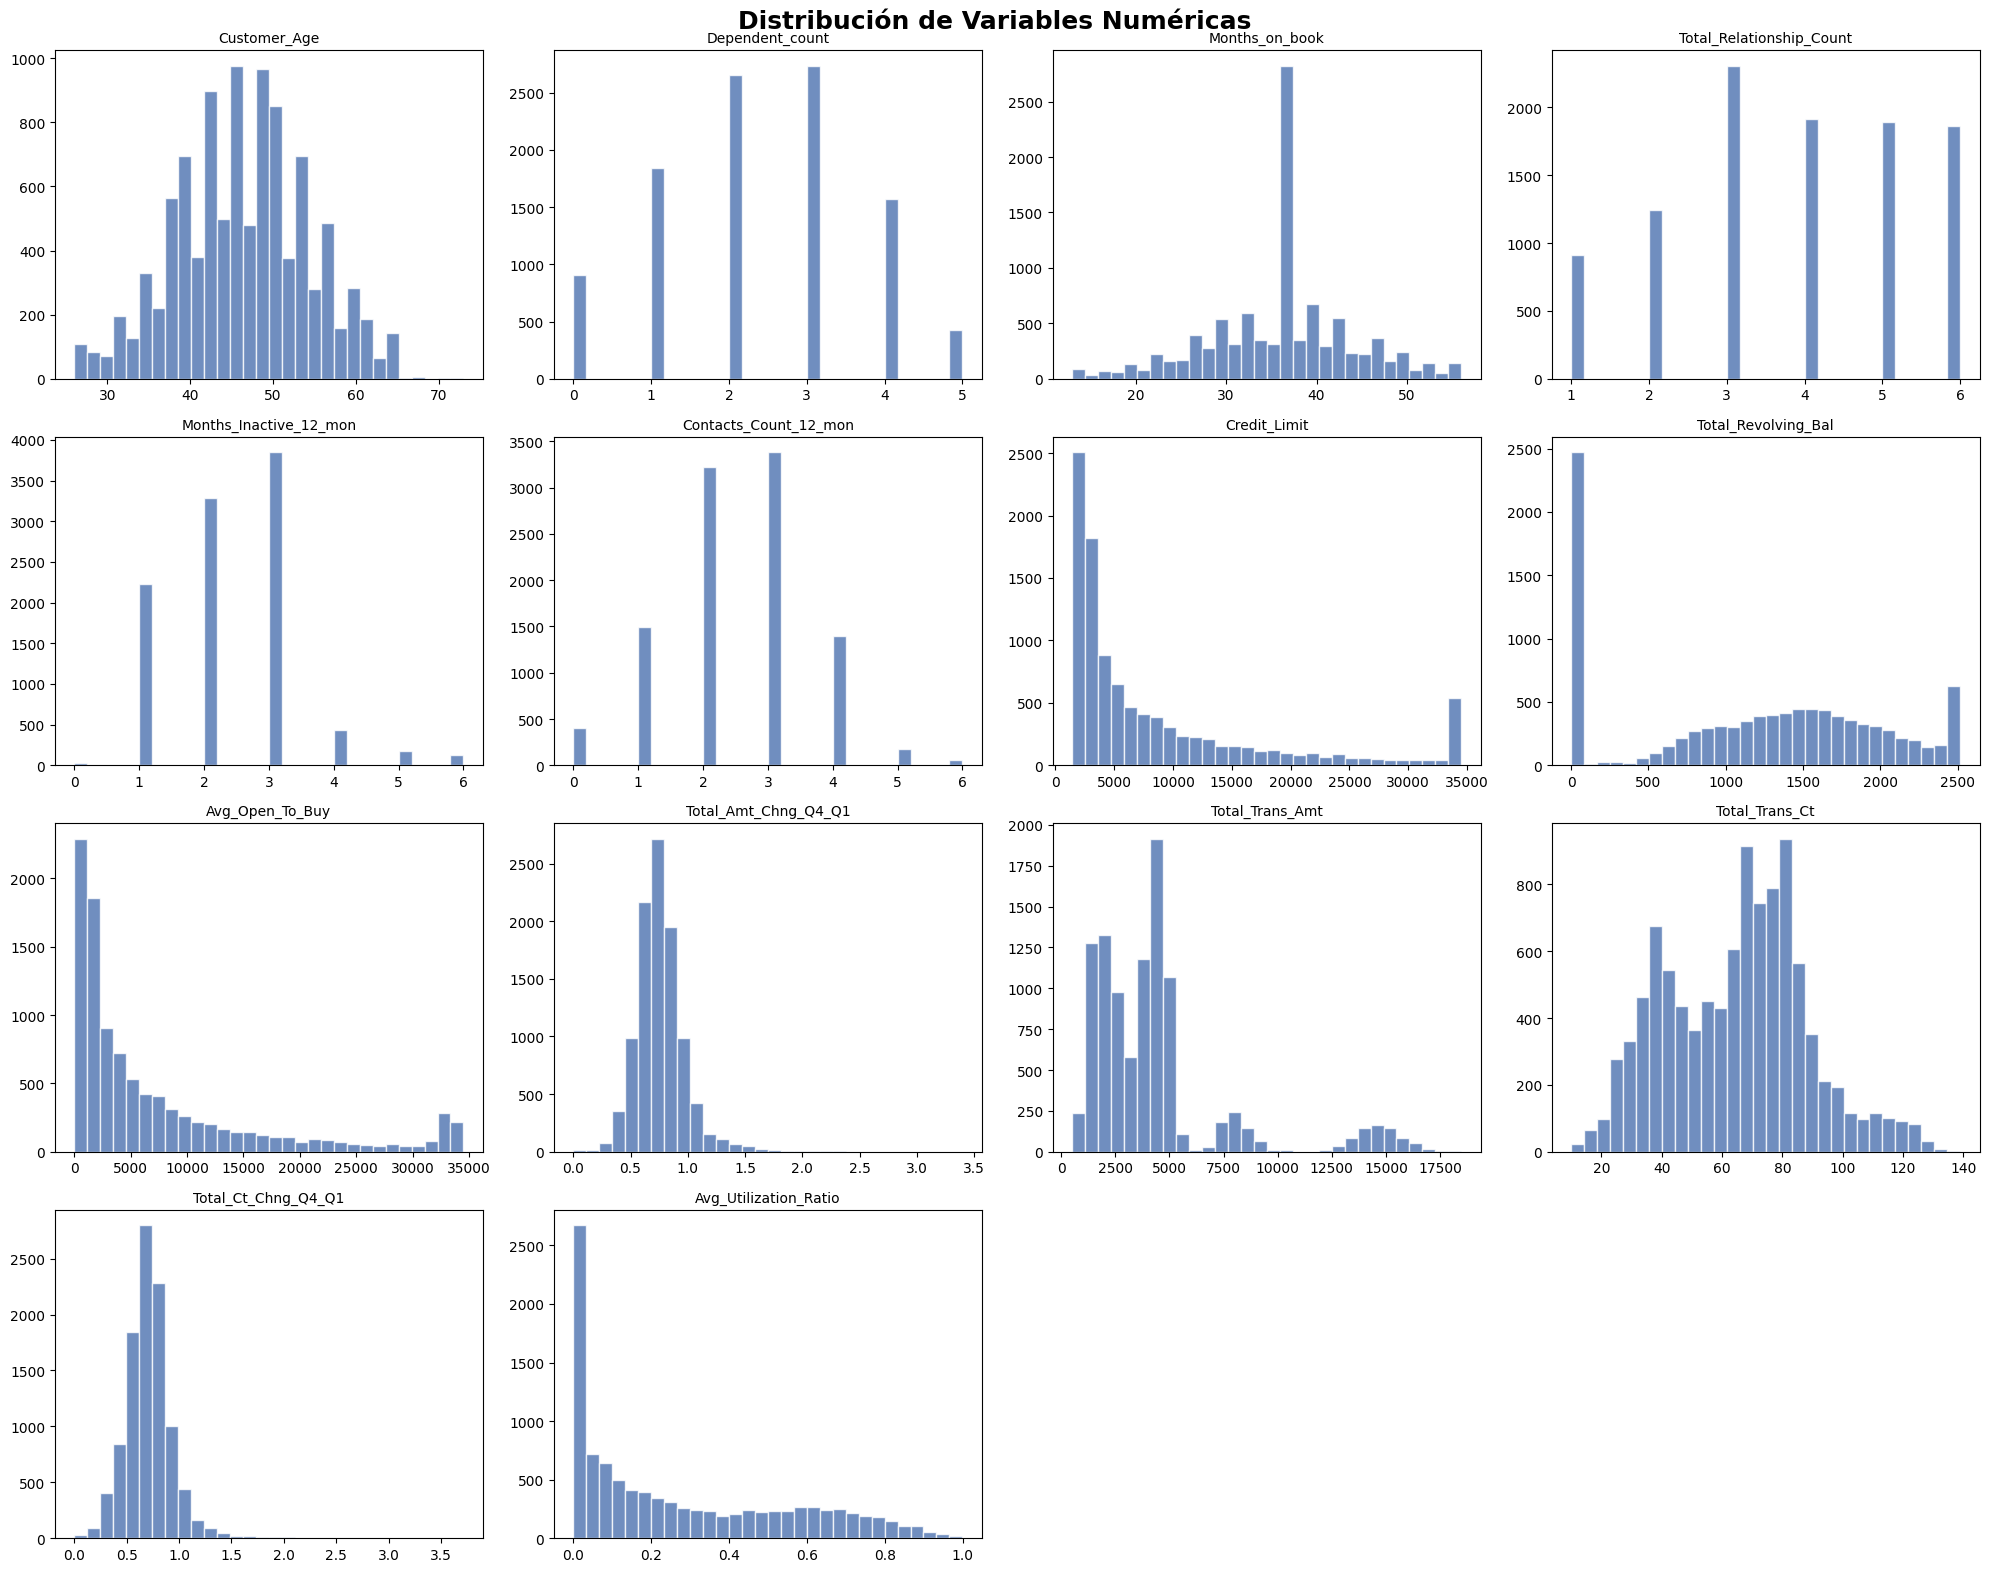

In [81]:
numericas = df.select_dtypes(include='number').columns.drop('CLIENTNUM')

fig, axes = plt.subplots(4, 4, figsize=(20, 16))
fig.suptitle('Distribución de Variables Numéricas', fontsize=18, fontweight='bold')

axes = axes.flatten()

for i, col in enumerate(numericas):
    axes[i].hist(df[col], bins=30, color='#4C72B0', edgecolor='white', alpha=0.8)
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel('')

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

* Visualización de variables categóricas

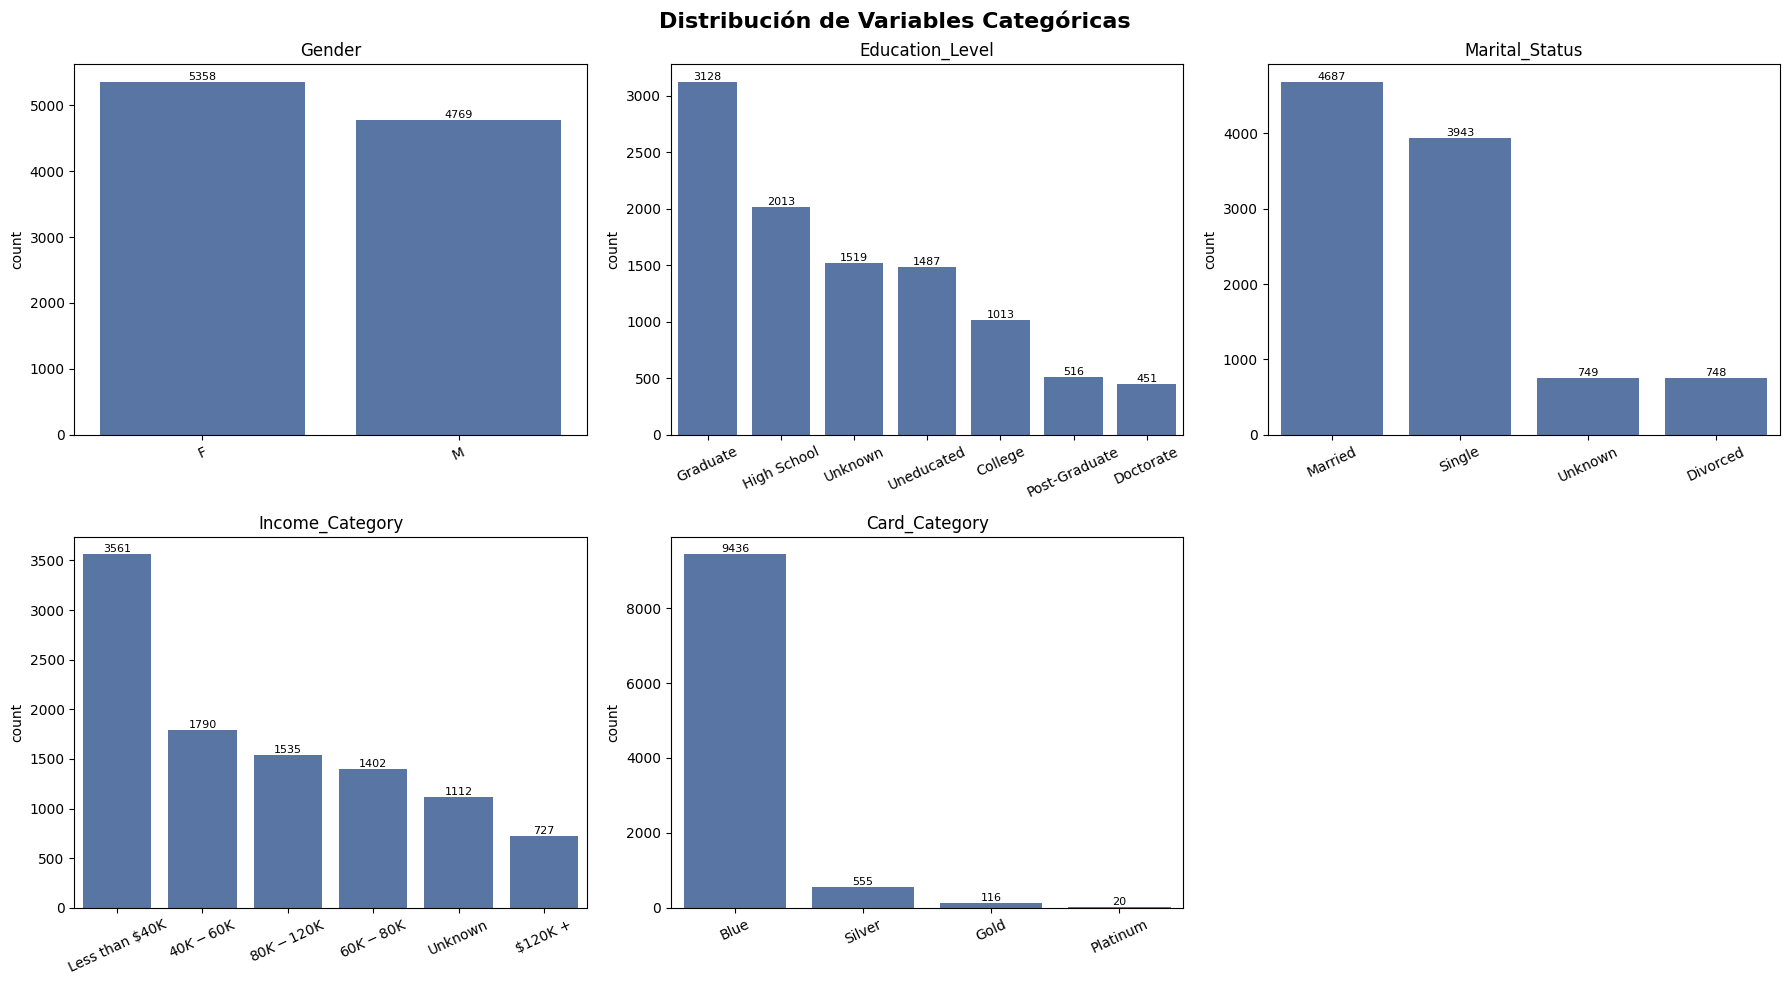

In [82]:
categoricas = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribución de Variables Categóricas', fontsize=16, fontweight='bold')
axes = axes.flatten()

for i, col in enumerate(categoricas):
    orden = df[col].value_counts().index

    sns.countplot(data=df, x=col, ax=axes[i], order=orden, color='#4C72B0')

    axes[i].set_title(col, fontsize=12)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=25)

    for p in axes[i].patches:
        axes[i].annotate(f'{int(p.get_height())}',
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='bottom', fontsize=8)

axes[5].set_visible(False)

plt.tight_layout()
plt.show()

* Estadísticas importantes para el análisis de churn

In [53]:
vars_importantes = ['Customer_Age', 'Credit_Limit', 'Total_Trans_Amt',
                    'Total_Trans_Ct', 'Avg_Utilization_Ratio', 'Months_on_book']

df[vars_importantes].describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10127.00,46.33,8.02,26.00,41.00,46.00,52.00,73.00
Credit_Limit,10127.00,8631.95,9088.78,1438.30,2555.00,4549.00,11067.50,34516.00
Total_Trans_Amt,10127.00,4404.09,3397.13,510.00,2155.50,3899.00,4741.00,18484.00
Total_Trans_Ct,10127.00,64.86,23.47,10.00,45.00,67.00,81.00,139.00
Avg_Utilization_Ratio,10127.00,0.27,0.28,0.00,0.02,0.18,0.50,1.00
Months_on_book,10127.00,35.93,7.99,13.00,31.00,36.00,40.00,56.00


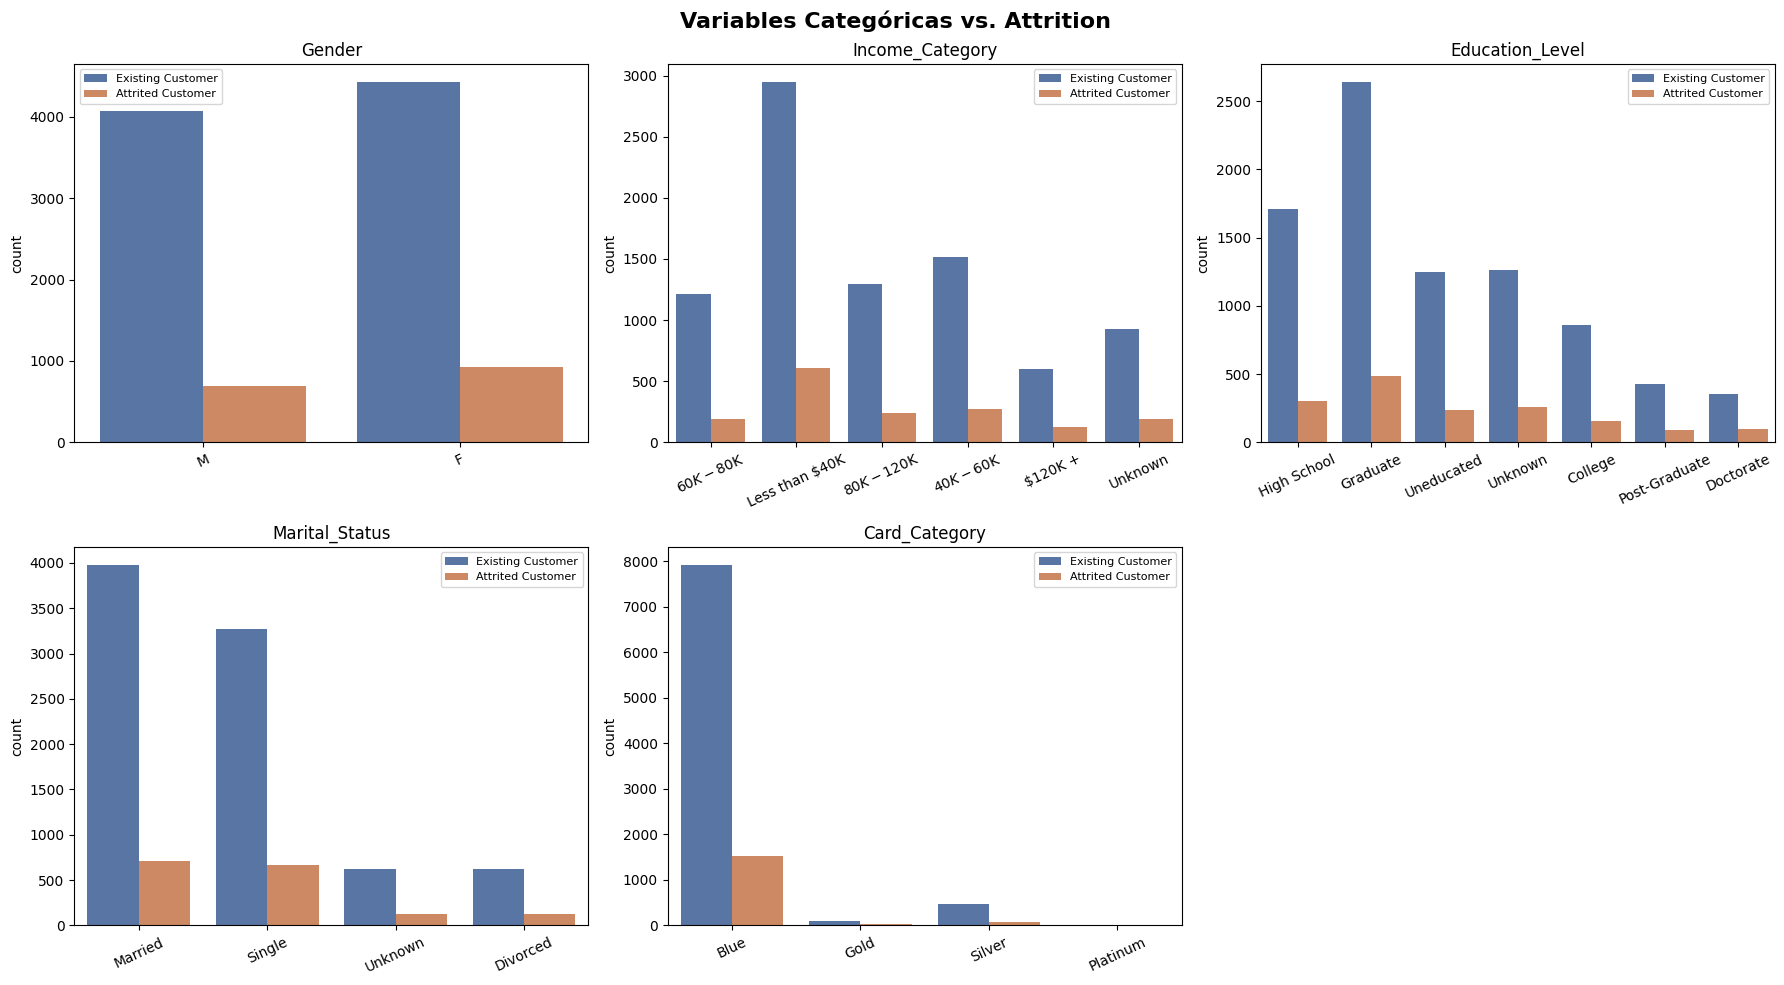

In [54]:
categoricas = ['Gender', 'Income_Category', 'Education_Level', 'Marital_Status', 'Card_Category']
palette = {'Existing Customer': '#4C72B0', 'Attrited Customer': '#DD8452'}

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Variables Categóricas vs. Attrition', fontsize=16, fontweight='bold')
axes = axes.flatten()

for i, col in enumerate(categoricas):
    sns.countplot(data=df, x=col, hue='Attrition_Flag', ax=axes[i], palette=palette)

    axes[i].set_title(col, fontsize=12)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=25)
    axes[i].legend(title='', fontsize=8)

axes[5].set_visible(False)
plt.tight_layout()
plt.show()

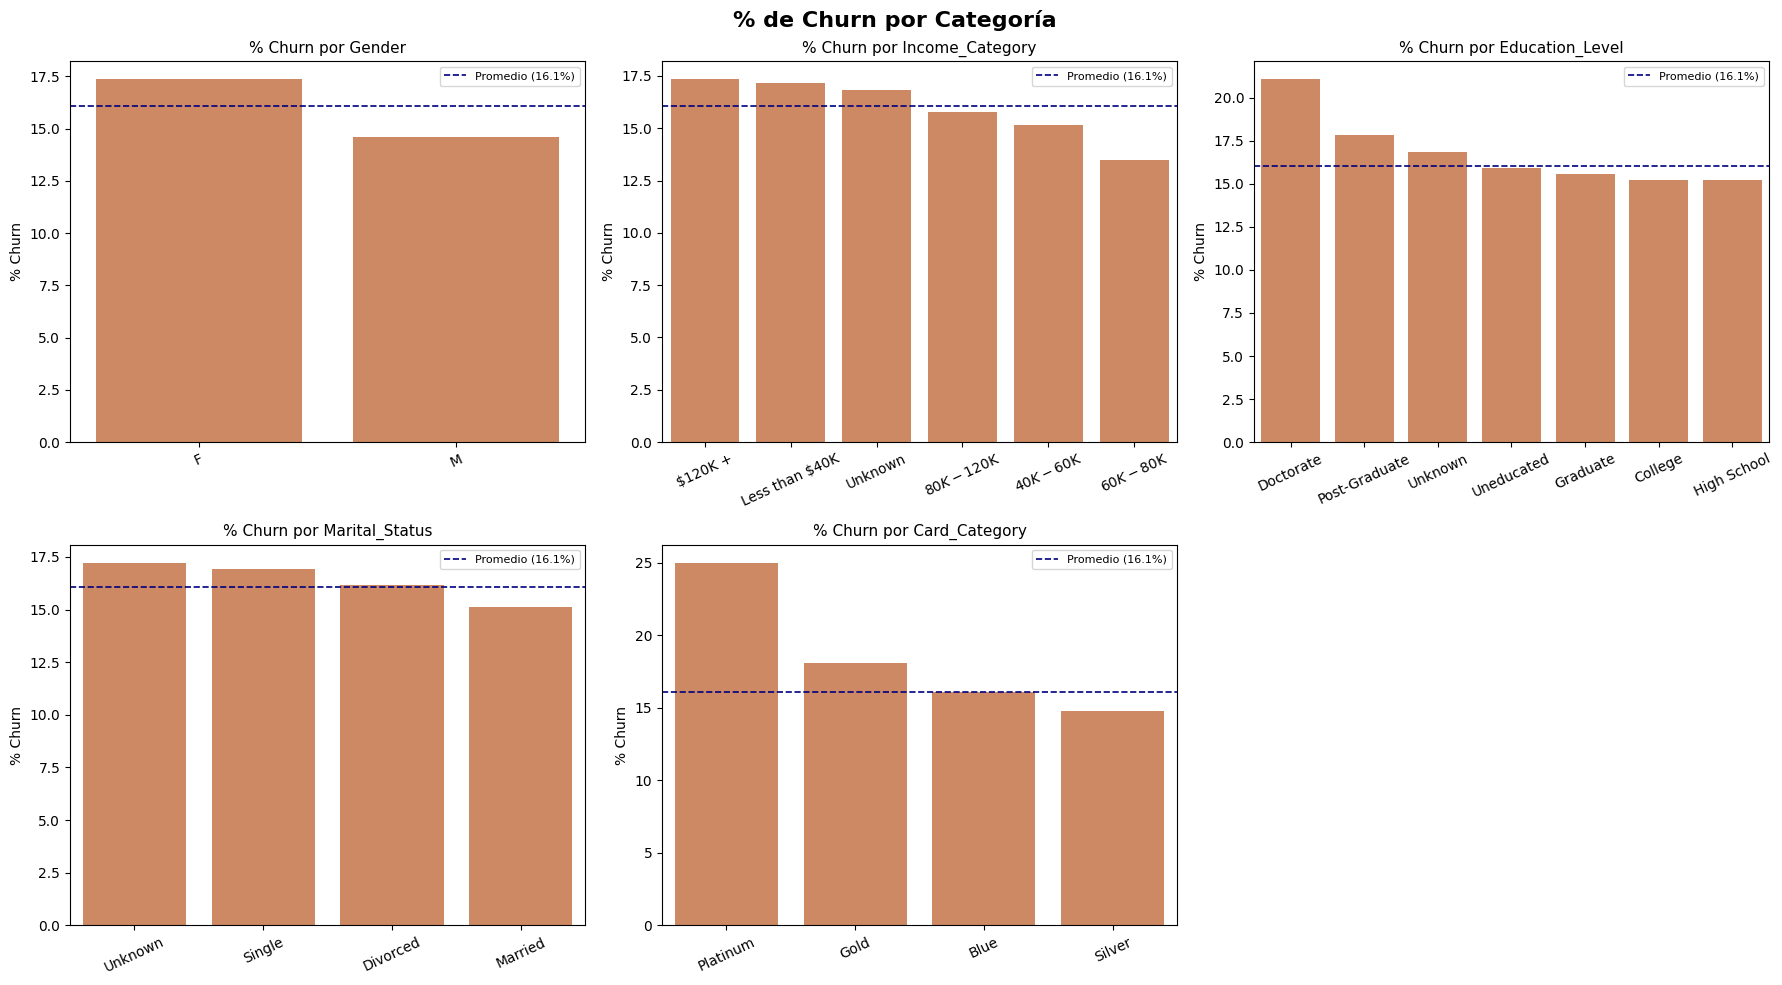

In [57]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('% de Churn por Categoría', fontsize=16, fontweight='bold')
axes = axes.flatten()

for i, col in enumerate(categoricas):
    churn_rate = (
        df.groupby(col)['Attrition_Flag']
        .apply(lambda x: (x == 'Attrited Customer').mean() * 100)
        .reset_index()
    )
    churn_rate.columns = [col, 'churn_pct']

    sns.barplot(data=churn_rate, x=col, y='churn_pct', ax=axes[i], color='#DD8452')
    axes[i].set_title(f'% Churn por {col}', fontsize=11)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('% Churn')
    axes[i].tick_params(axis='x', rotation=25)

    # Línea de referencia: el churn promedio general
    promedio_churn = (df['Attrition_Flag'] == 'Attrited Customer').mean() * 100
    axes[i].axhline(promedio_churn, color='navy', linestyle='--', linewidth=1.2, label=f'Promedio ({promedio_churn:.1f}%)')
    axes[i].legend(fontsize=8)

axes[5].set_visible(False)
plt.tight_layout()
plt.show()


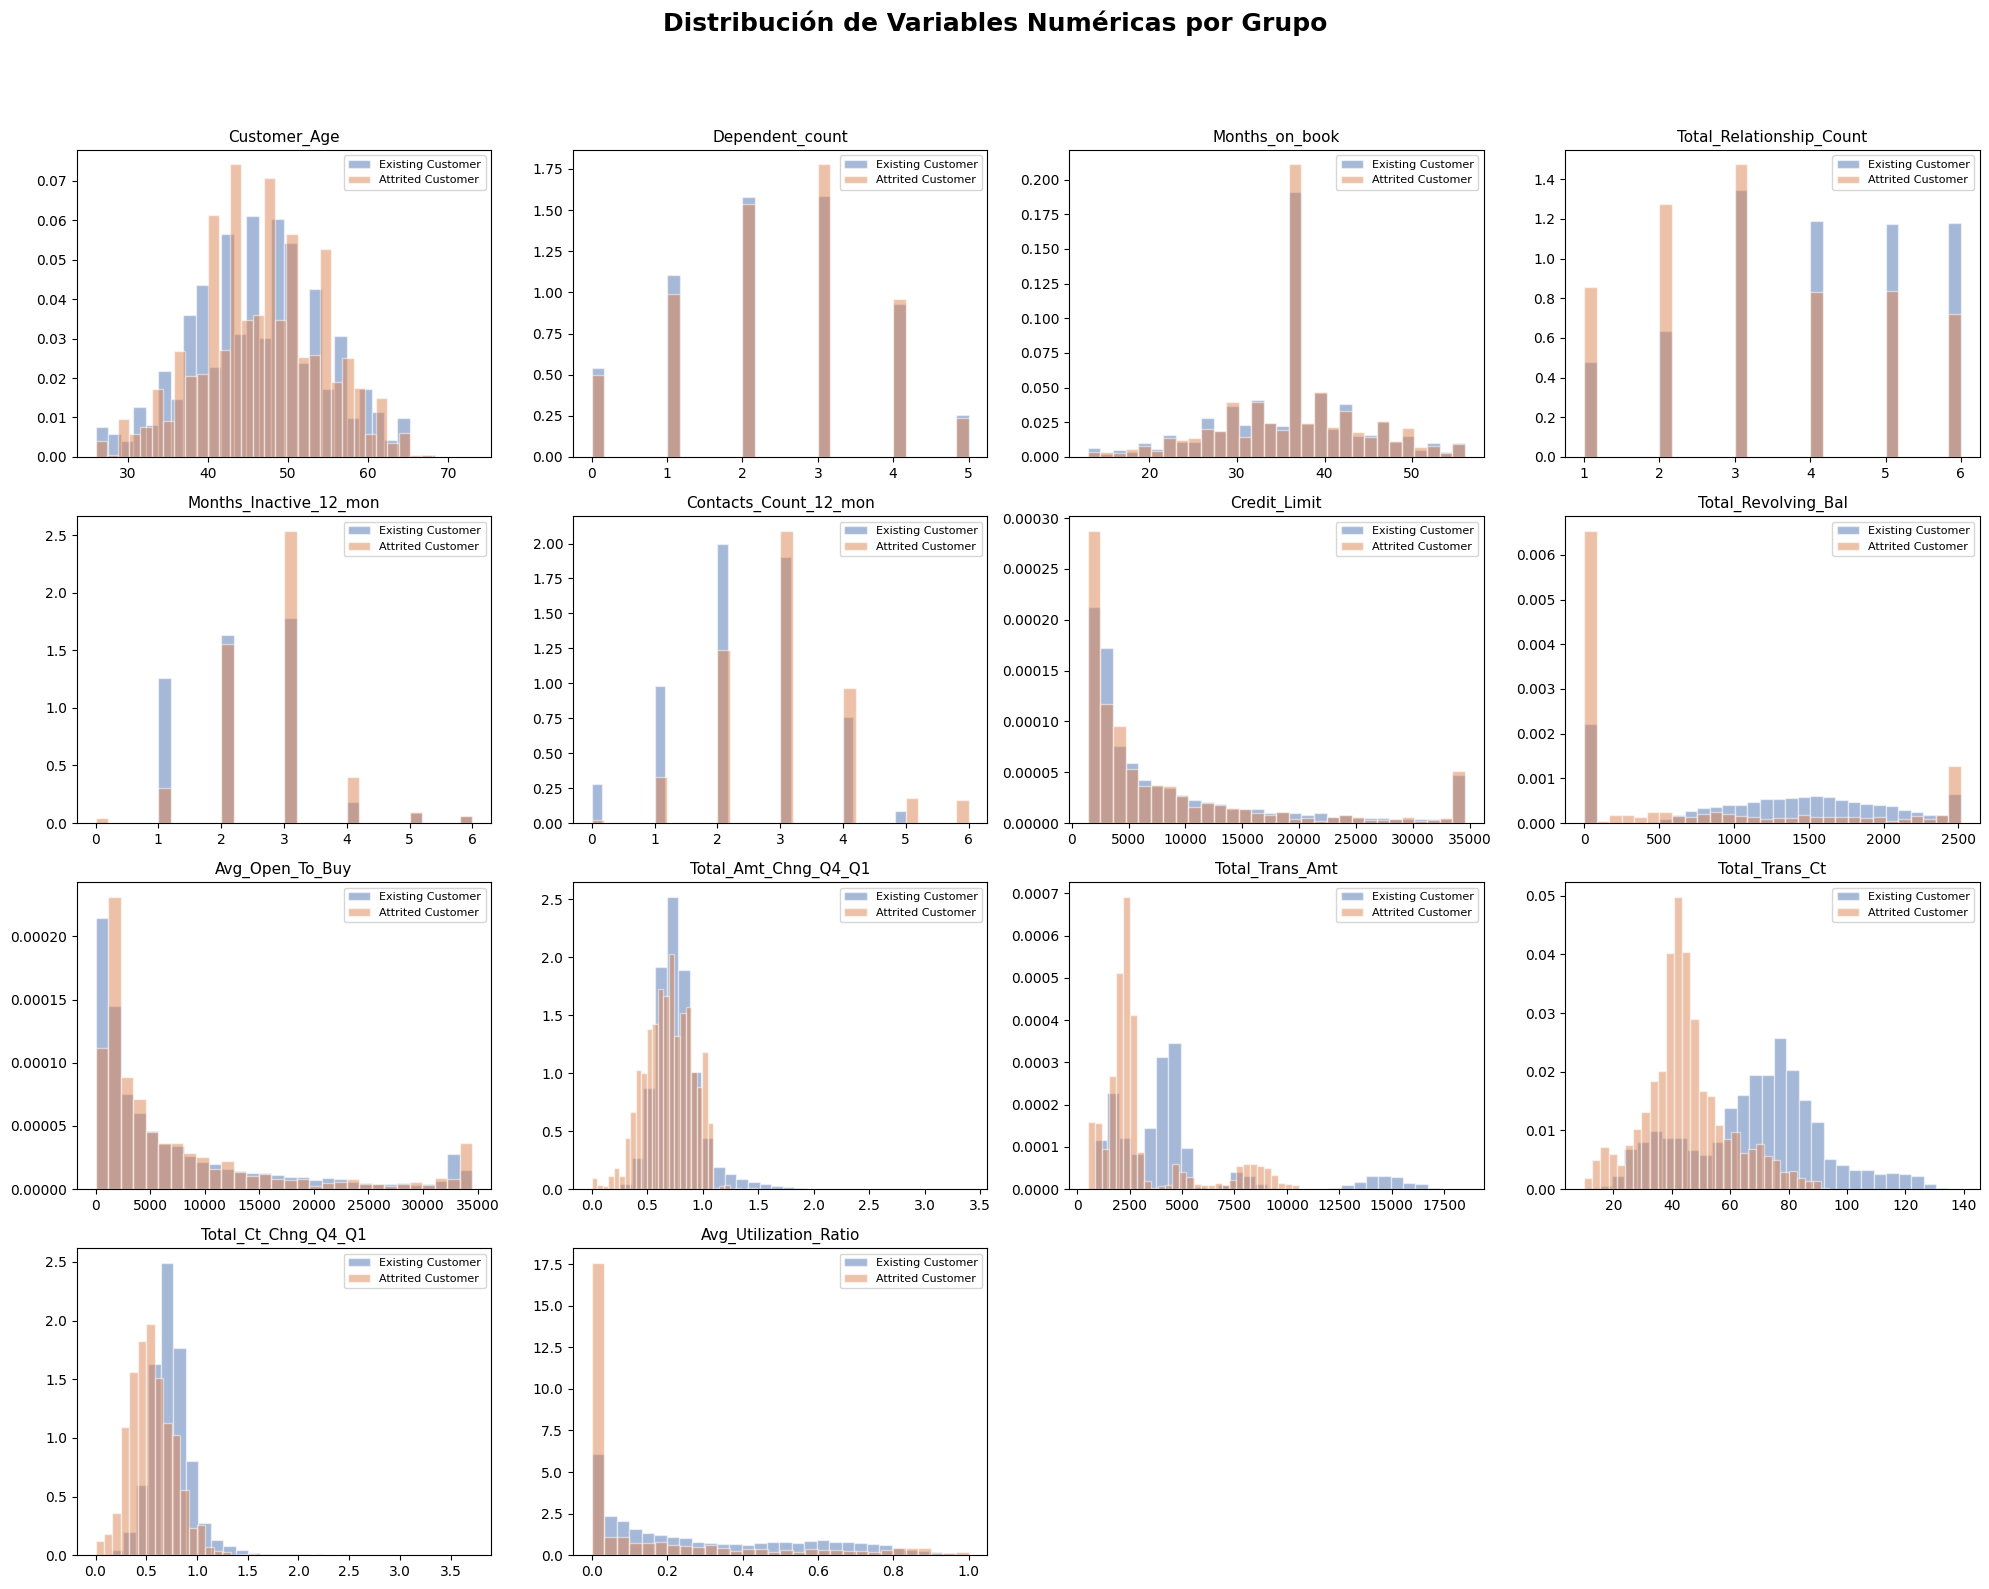

In [83]:
numericas = df.select_dtypes(include='number').columns.drop('CLIENTNUM')


fig, axes = plt.subplots(4, 4, figsize=(20, 16))
fig.suptitle('Distribución de Variables Numéricas por Grupo', fontsize=18, fontweight='bold', y=1.02)
axes = axes.flatten()

for i, col in enumerate(numericas):
    for flag, color in zip(['Existing Customer', 'Attrited Customer'], ['#4C72B0', '#DD8452']):
        subset = df[df['Attrition_Flag'] == flag]
        axes[i].hist(subset[col], bins=30, alpha=0.5, label=flag, color=color, density=True, edgecolor='white')

    axes[i].set_title(col, fontsize=11)
    axes[i].legend(fontsize=8)

for j in range(len(numericas), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

/tmp/ipython-input-883969230.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition_Flag', y=col, ax=axes[i], palette=palette)
/tmp/ipython-input-883969230.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition_Flag', y=col, ax=axes[i], palette=palette)
/tmp/ipython-input-883969230.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Attrition_Flag', y=col, ax=axes[i], palette=palette)
/tmp/ipython-input-883969230.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

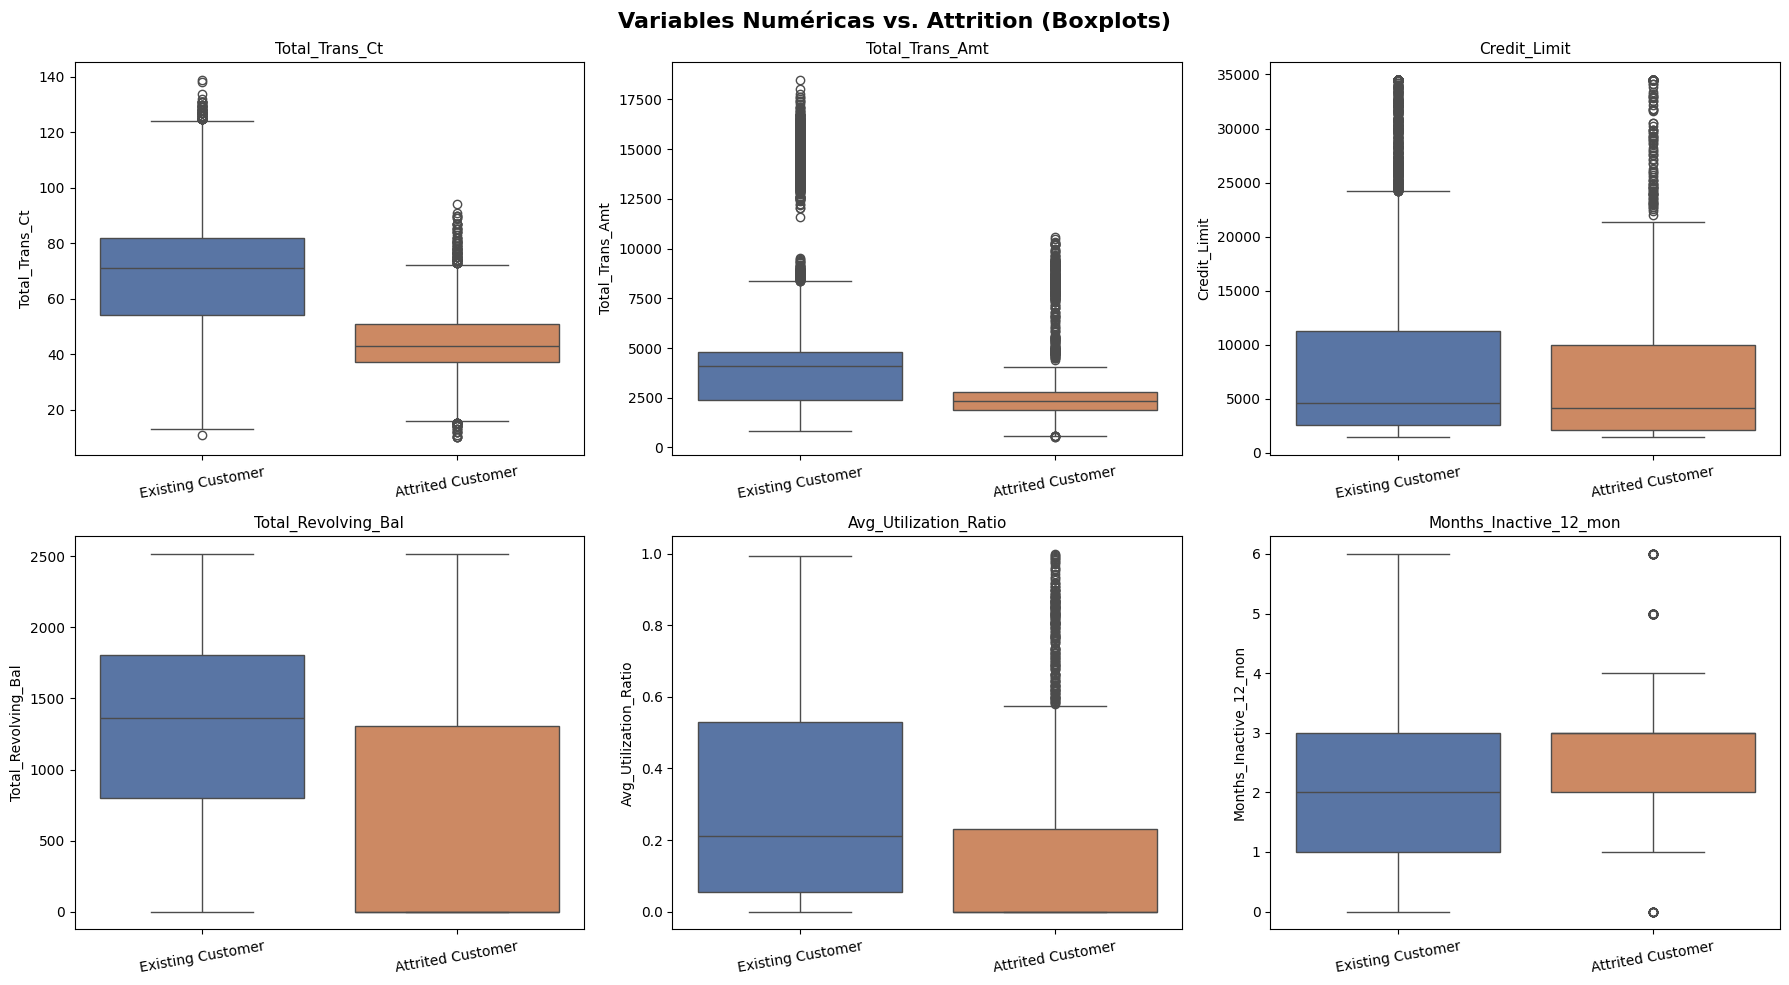

In [62]:
vars_numericas = ['Total_Trans_Ct', 'Total_Trans_Amt', 'Credit_Limit',
                  'Total_Revolving_Bal', 'Avg_Utilization_Ratio', 'Months_Inactive_12_mon']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Variables Numéricas vs. Attrition (Boxplots)', fontsize=16, fontweight='bold')
axes = axes.flatten()

for i, col in enumerate(vars_numericas):
    sns.boxplot(data=df, x='Attrition_Flag', y=col, ax=axes[i], palette=palette)

    axes[i].set_title(col, fontsize=11)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', rotation=10)

plt.tight_layout()
plt.show()

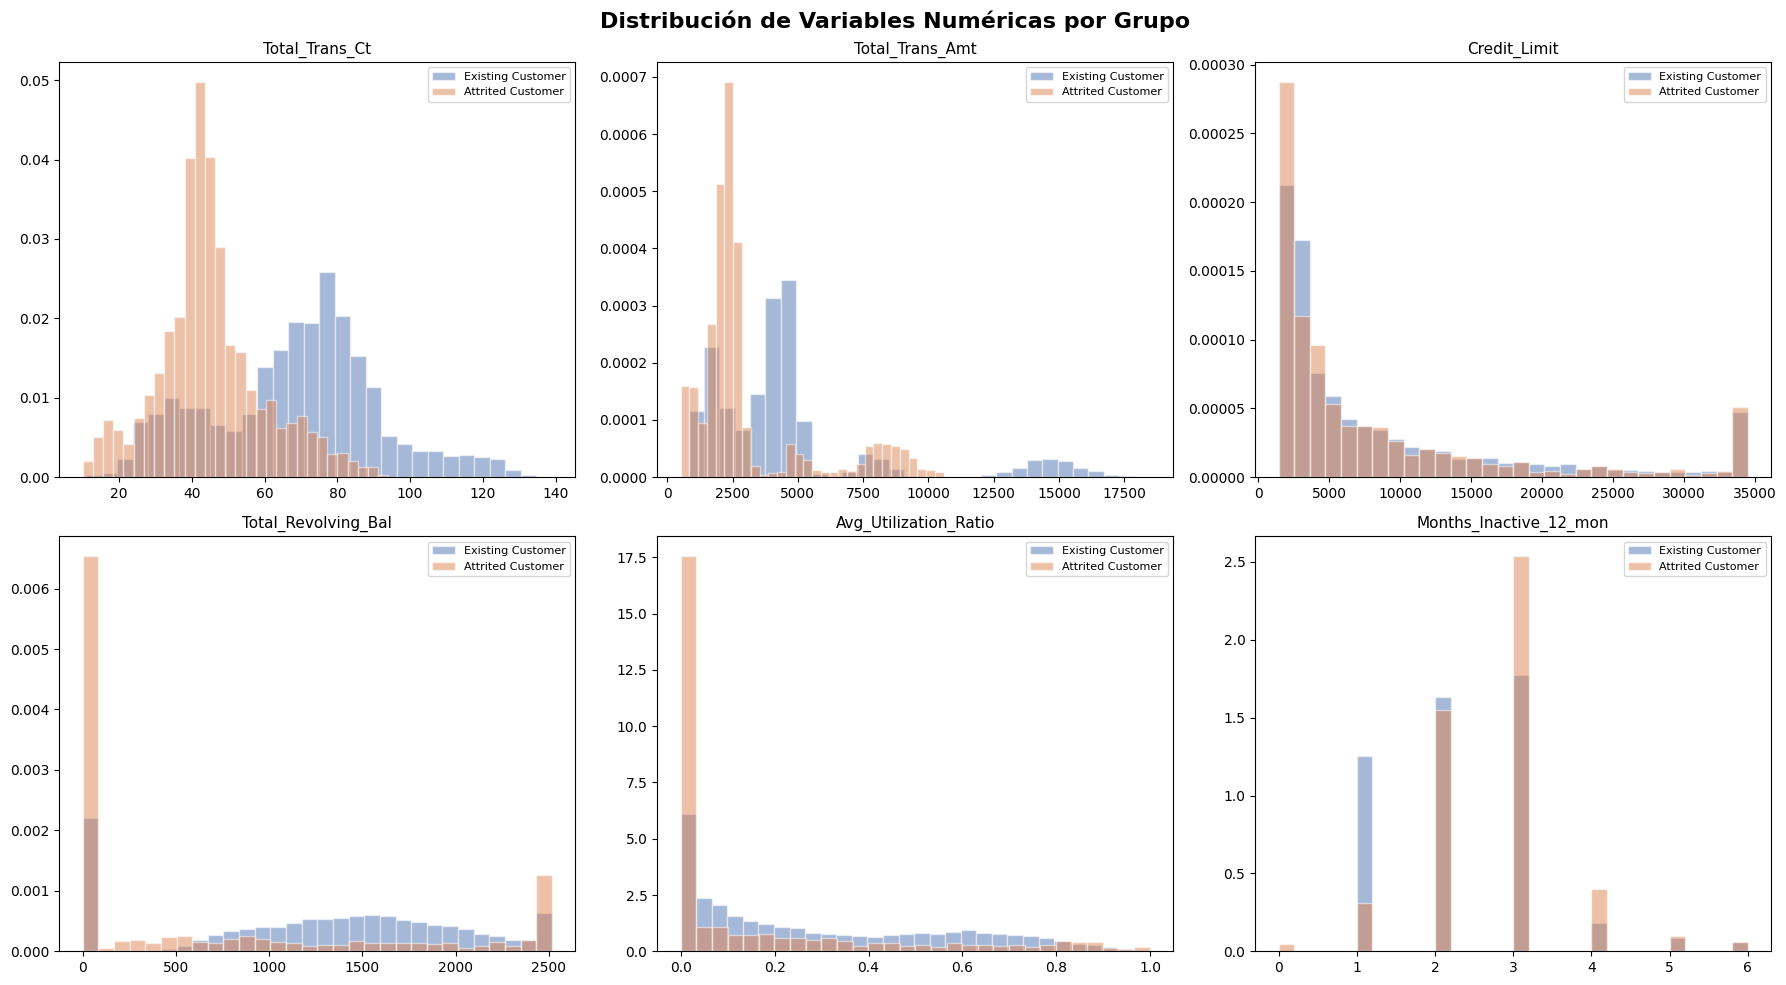

In [63]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribución de Variables Numéricas por Grupo', fontsize=16, fontweight='bold')
axes = axes.flatten()

for i, col in enumerate(vars_numericas):
    for flag, color in zip(['Existing Customer', 'Attrited Customer'], ['#4C72B0', '#DD8452']):
        subset = df[df['Attrition_Flag'] == flag]

        axes[i].hist(subset[col], bins=30, alpha=0.5, label=flag,
                     color=color, density=True, edgecolor='white')


    axes[i].set_title(col, fontsize=11)
    axes[i].legend(fontsize=8)

plt.tight_layout()
plt.show()

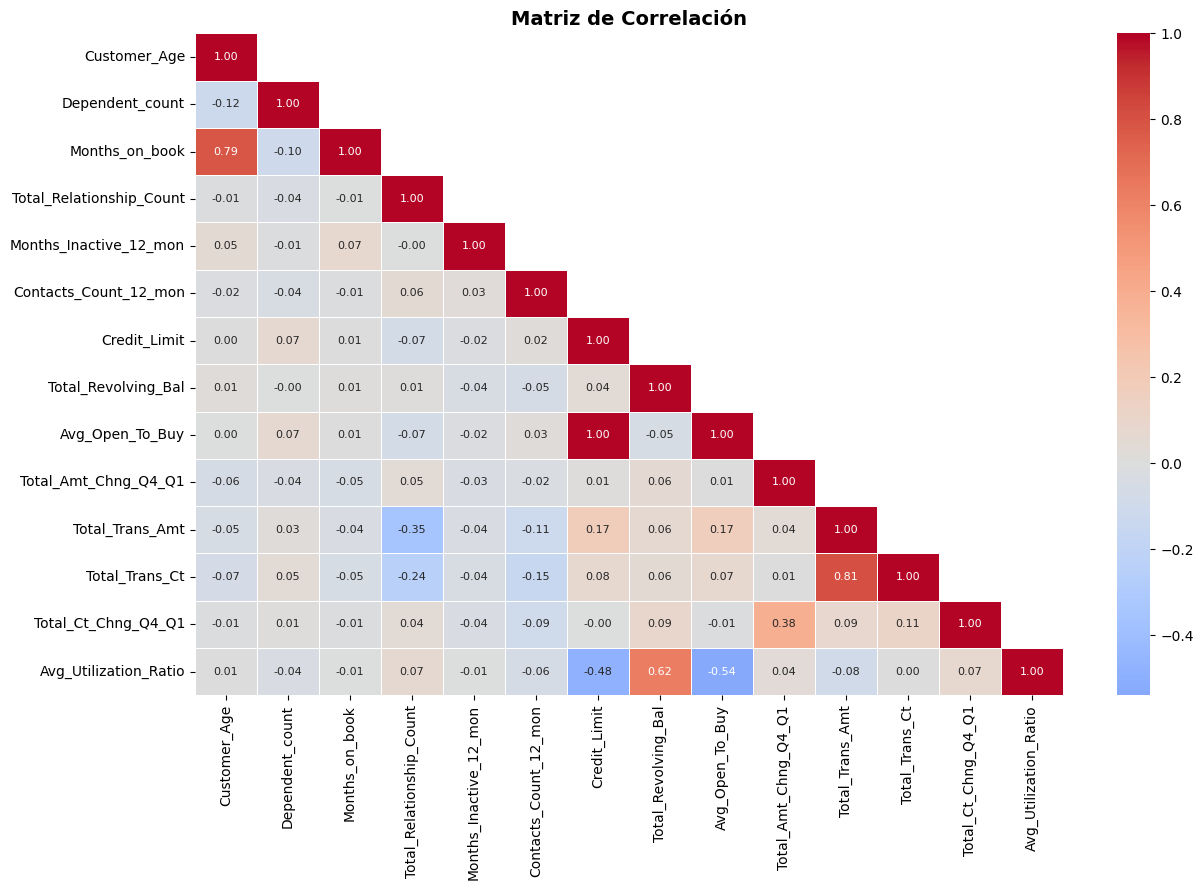

In [64]:
num_df = df.select_dtypes(include='number').drop(columns='CLIENTNUM')

corr = num_df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

fig, ax = plt.subplots(figsize=(13, 9))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    ax=ax,
    annot_kws={'size': 8}
)
ax.set_title('Matriz de Correlación', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [65]:
hallazgos = {
    'Variable': ['Total_Trans_Ct', 'Total_Trans_Amt', 'Months_Inactive_12_mon',
                 'Credit_Limit', 'Avg_Open_To_Buy'],
    'Hallazgo': [
        'Churners hacen ~40% menos transacciones — variable más discriminante',
        'Churners gastan significativamente menos',
        'Churners tienen más meses de inactividad',
        'Correlación 0.99 con Avg_Open_To_Buy — considerar eliminar una',
        'Correlación 0.99 con Credit_Limit — considerar eliminar una'
    ]
}
pd.DataFrame(hallazgos)

,Variable,Hallazgo
0,Total_Trans_Ct,Churners hacen ~40% menos transacciones — vari...
1,Total_Trans_Amt,Churners gastan significativamente menos
2,Months_Inactive_12_mon,Churners tienen más meses de inactividad
3,Credit_Limit,Correlación 0.99 con Avg_Open_To_Buy — conside...
4,Avg_Open_To_Buy,Correlación 0.99 con Credit_Limit — considerar...


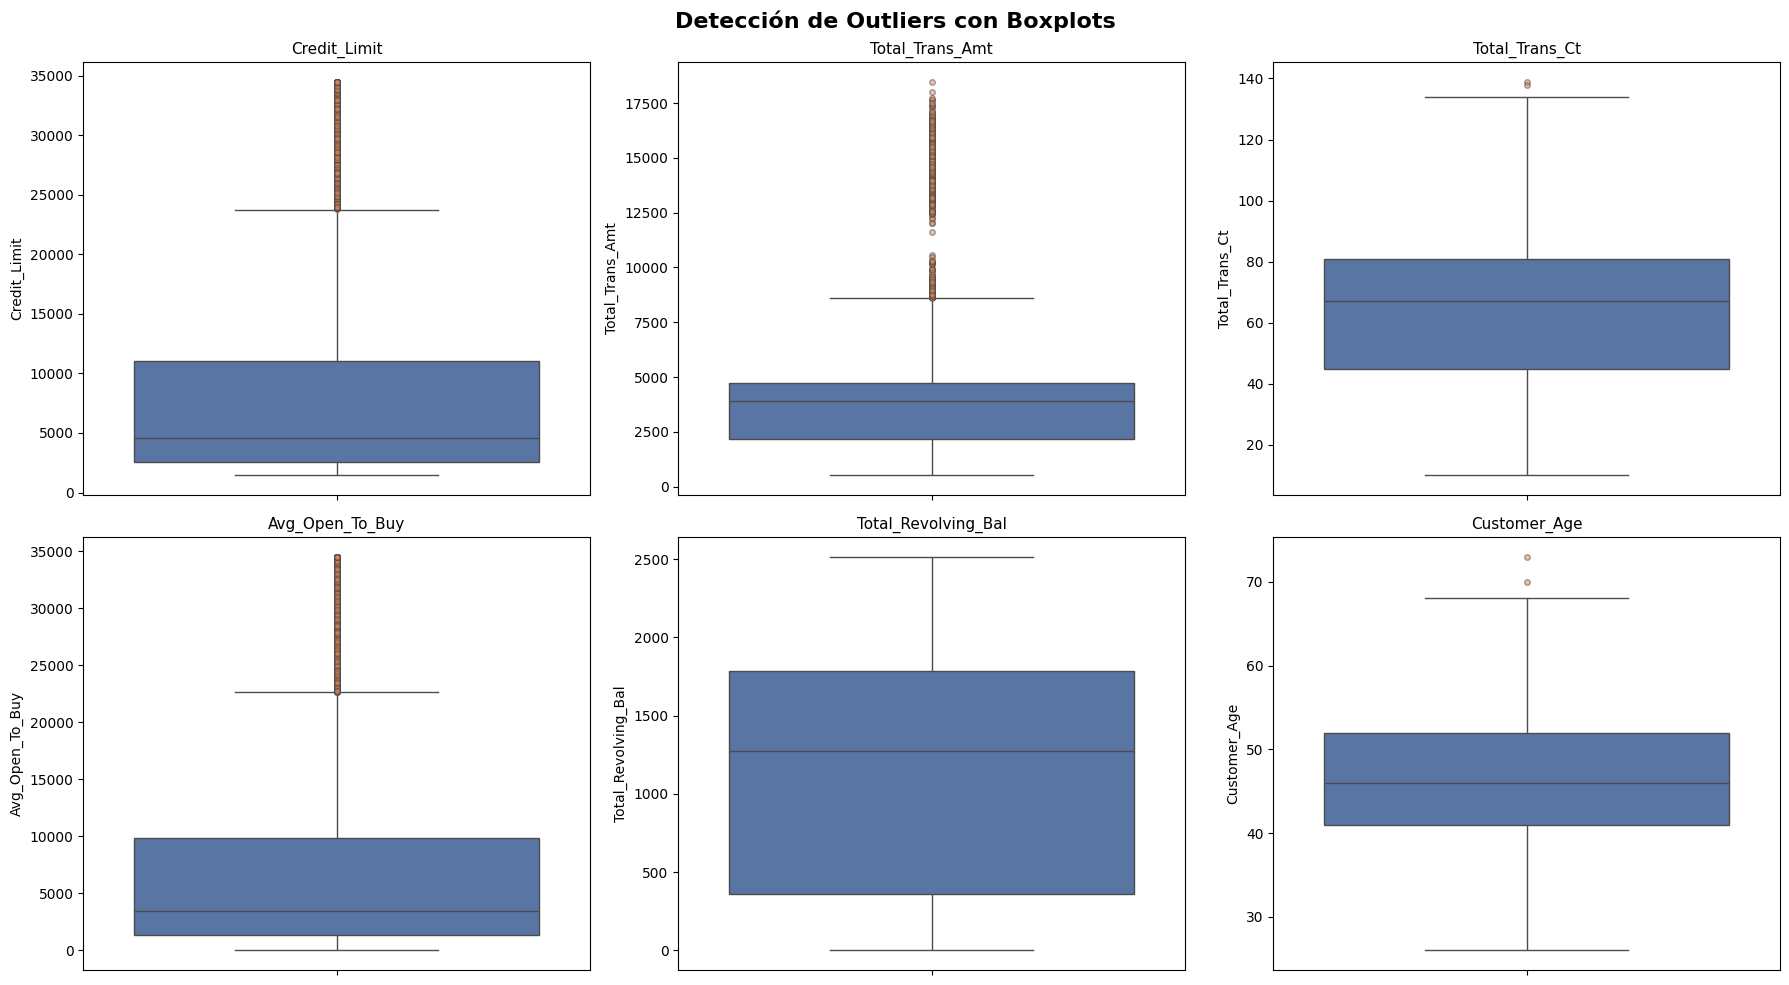

In [66]:
vars_revisar = ['Credit_Limit', 'Total_Trans_Amt', 'Total_Trans_Ct',
                'Avg_Open_To_Buy', 'Total_Revolving_Bal', 'Customer_Age']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Detección de Outliers con Boxplots', fontsize=16, fontweight='bold')
axes = axes.flatten()

for i, col in enumerate(vars_revisar):
    sns.boxplot(data=df, y=col, ax=axes[i], color='#4C72B0',
                flierprops=dict(marker='o', markerfacecolor='#DD8452',
                                markersize=4, alpha=0.5))

    axes[i].set_title(col, fontsize=11)
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

In [67]:
def detectar_outliers_iqr(df, columna):
    """
    Detecta outliers usando la regla del IQR.
    Recibe el dataframe y el nombre de una columna.
    Devuelve un resumen con los límites y cuántos outliers hay.
    """
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR


    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]


    return {
        'Q1': round(Q1, 2),
        'Q3': round(Q3, 2),
        'IQR': round(IQR, 2),
        'Límite inferior': round(limite_inferior, 2),
        'Límite superior': round(limite_superior, 2),
        'Nº outliers': len(outliers),
        '% del total': round(len(outliers) / len(df) * 100, 2)
    }

# Tabla resumen
resultados = []
for col in vars_revisar:
    fila = {'Variable': col}
    fila.update(detectar_outliers_iqr(df, col))
    resultados.append(fila)

resumen_outliers = pd.DataFrame(resultados).set_index('Variable')
resumen_outliers

,Q1,Q3,IQR,Límite inferior,Límite superior,Nº outliers,% del total
Variable,,,,,,,
Credit_Limit,2555.00,11067.50,8512.50,-10213.75,23836.25,984,9.72
Total_Trans_Amt,2155.50,4741.00,2585.50,-1722.75,8619.25,896,8.85
Total_Trans_Ct,45.00,81.00,36.00,-9.00,135.00,2,0.02
Avg_Open_To_Buy,1324.50,9859.00,8534.50,-11477.25,22660.75,963,9.51
Total_Revolving_Bal,359.00,1784.00,1425.00,-1778.50,3921.50,0,0.00
Customer_Age,41.00,52.00,11.00,24.50,68.50,2,0.02


In [87]:
print(" Variables ordenadas por número de outliers:")
print(resumen_outliers[['Nº outliers', '% del total']].sort_values('Nº outliers', ascending=False))

 Variables ordenadas por número de outliers:
                     Nº outliers  % del total
Variable                                     
Credit_Limit                 984         9.72
Avg_Open_To_Buy              963         9.51
Total_Trans_Amt              896         8.85
Total_Trans_Ct                 2         0.02
Customer_Age                   2         0.02
Total_Revolving_Bal            0         0.00


In [69]:
limite_credito_q3 = df['Credit_Limit'].quantile(0.75)
iqr_credito = limite_credito_q3 - df['Credit_Limit'].quantile(0.25)
limite_superior_credito = limite_credito_q3 + 1.5 * iqr_credito

clientes_extremos = df[df['Credit_Limit'] > limite_superior_credito]

print(f"Clientes con Credit_Limit outlier: {len(clientes_extremos)}")
print(f"\nPerfil promedio de estos clientes:")
print(clientes_extremos[['Customer_Age', 'Credit_Limit', 'Income_Category',
                           'Card_Category', 'Attrition_Flag']].describe())

Clientes con Credit_Limit outlier: 984

Perfil promedio de estos clientes:
       Customer_Age  Credit_Limit
count        984.00        984.00
mean          46.38      31551.34
std            6.72       3764.07
min           26.00      23848.00
25%           42.00      28284.50
50%           47.00      34516.00
75%           51.00      34516.00
max           65.00      34516.00


In [70]:
churn_extremos = (clientes_extremos['Attrition_Flag'] == 'Attrited Customer').mean() * 100
churn_general = (df['Attrition_Flag'] == 'Attrited Customer').mean() * 100

print(f"% Churn en clientes con Credit_Limit extremo: {churn_extremos:.1f}%")
print(f"% Churn general:                              {churn_general:.1f}%")

% Churn en clientes con Credit_Limit extremo: 16.1%
% Churn general:                              16.1%


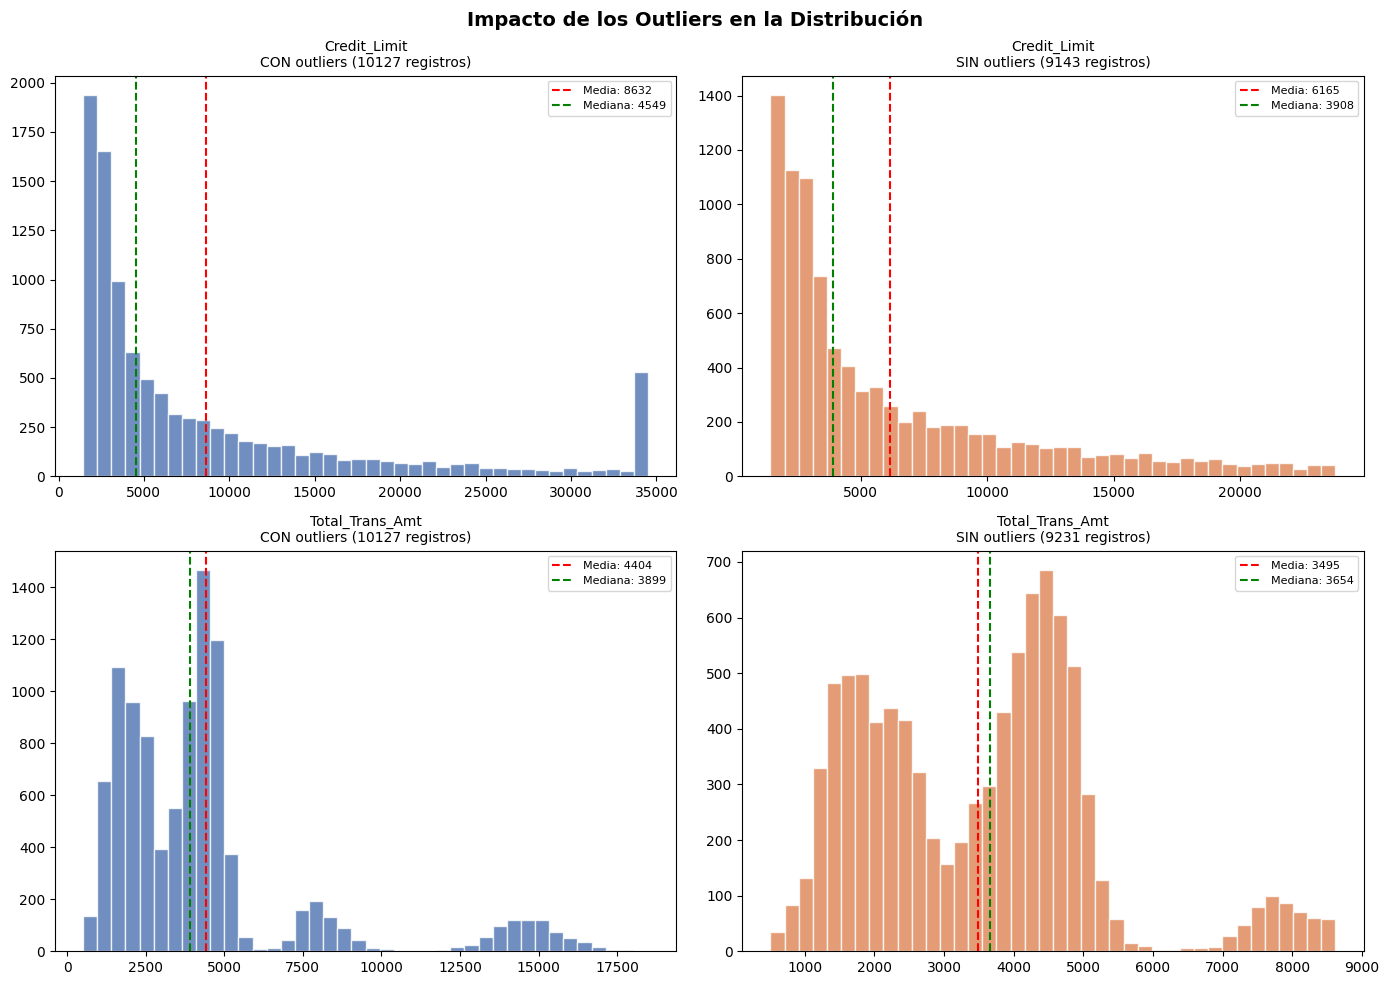

In [86]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Impacto de los Outliers en la Distribución', fontsize=14, fontweight='bold')

for ax_pair, col in zip([(axes[0,0], axes[0,1]), (axes[1,0], axes[1,1])],
                         ['Credit_Limit', 'Total_Trans_Amt']):
    ax_con, ax_sin = ax_pair


    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lim_sup = Q3 + 1.5 * IQR
    lim_inf = Q1 - 1.5 * IQR


    df_sin = df[(df[col] >= lim_inf) & (df[col] <= lim_sup)]



    ax_con.hist(df[col], bins=40, color='#4C72B0', edgecolor='white', alpha=0.8)
    ax_con.set_title(f'{col}\nCON outliers ({len(df)} registros)', fontsize=10)
    ax_con.axvline(df[col].mean(), color='red', linestyle='--', label=f'Media: {df[col].mean():.0f}')
    ax_con.axvline(df[col].median(), color='green', linestyle='--', label=f'Mediana: {df[col].median():.0f}')
    ax_con.legend(fontsize=8)


    ax_sin.hist(df_sin[col], bins=40, color='#DD8452', edgecolor='white', alpha=0.8)
    ax_sin.set_title(f'{col}\nSIN outliers ({len(df_sin)} registros)', fontsize=10)
    ax_sin.axvline(df_sin[col].mean(), color='red', linestyle='--', label=f'Media: {df_sin[col].mean():.0f}')
    ax_sin.axvline(df_sin[col].median(), color='green', linestyle='--', label=f'Mediana: {df_sin[col].median():.0f}')
    ax_sin.legend(fontsize=8)

plt.tight_layout()
plt.show()

In [73]:
print(f"Edad mínima: {df['Customer_Age'].min()} años")
print(f"Edad máxima: {df['Customer_Age'].max()} años")
print(f"\nDistribución de edades extremas:")
print(df[df['Customer_Age'] > 65]['Customer_Age'].value_counts().sort_index())

Edad mínima: 26 años
Edad máxima: 73 años

Distribución de edades extremas:
Customer_Age
66    2
67    4
68    2
70    1
73    1
Name: count, dtype: int64


##Resumen Ejecutivo

**Dataset:** Bank Churners — 10,127 clientes, 21 variables
**Objetivo:** Entender qué caracteriza a un cliente que abandona el banco

### Hallazgos principales:
1. El dataset está **desbalanceado**: 84% clientes activos vs 16% churners
2. Las variables más discriminantes son `Total_Trans_Ct` y `Total_Trans_Amt`
3. `Credit_Limit` y `Avg_Open_To_Buy` tienen correlación de 0.99 — son redundantes
4. Los outliers son clientes premium reales, no errores de datos
5. No hay valores nulos ni duplicados — dataset de buena calidad

In [85]:
df_limpio = df.drop(columns=['CLIENTNUM', 'Avg_Open_To_Buy'])

df_limpio.to_csv('BankChurners_limpio.csv', index=False)
